In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def get_im_labels(dir='./train'):
    '''获取图片及对应的label信息
    dir:对应图片目录
    return 图片名字及标签(随机打乱后的结果)
    '''
    lable_set = {'cat':0, 'dog':1}
    im_files = os.listdir(dir)
    im_label = [(os.path.join(os.path.abspath(dir),i_), lable_set[i_.split('.')[0]]) for i_ in im_files]
    #im_label = [(os.path.join(dir,i_), i_.split('.')[0]) for i_ in im_files]
    np.random.shuffle(im_label)
    im_label = np.asarray(im_label, dtype='object').reshape(len(im_label), 2)
    return im_label

In [3]:
im_label = get_im_labels()

In [6]:
im_label[:10]

array([['/home/l0o0/workspace/Udacity/final/train/dog.5151.jpg', 1],
       ['/home/l0o0/workspace/Udacity/final/train/dog.11803.jpg', 1],
       ['/home/l0o0/workspace/Udacity/final/train/dog.6675.jpg', 1],
       ['/home/l0o0/workspace/Udacity/final/train/cat.1817.jpg', 0],
       ['/home/l0o0/workspace/Udacity/final/train/cat.4432.jpg', 0],
       ['/home/l0o0/workspace/Udacity/final/train/cat.2687.jpg', 0],
       ['/home/l0o0/workspace/Udacity/final/train/dog.2087.jpg', 1],
       ['/home/l0o0/workspace/Udacity/final/train/dog.9308.jpg', 1],
       ['/home/l0o0/workspace/Udacity/final/train/dog.6734.jpg', 1],
       ['/home/l0o0/workspace/Udacity/final/train/cat.1545.jpg', 0]],
      dtype=object)

In [5]:
im_label[:, 1].astype(np.int32)

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [4]:
from PIL import Image

In [5]:
i = Image.open('/home/l0o0/workspace/Udacity/final/train/cat.3137.jpg')
i.size

(499, 398)

In [7]:
def get_size(img):
    img = Image.open(img)
    return img.size[0]*img.size[1]

size_list = [get_size(img) for img in im_label[:, 0]]

In [8]:
import seaborn as sns

/home/l0o0/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Density'),
 Text(0.5,0,'Size'),
 Text(0.5,1,'Figure size(width*height) distribution')]

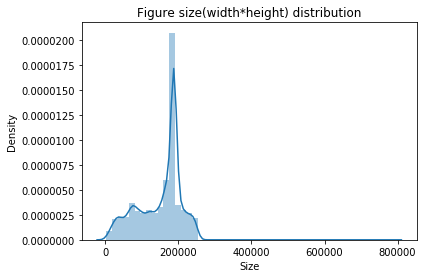

In [12]:
ax = sns.distplot(size_list)
ax.set(title='Figure size(width*height) distribution', xlabel='Size', ylabel='Density')

In [13]:
max(size_list)

785664

In [14]:
size_list.index(785664)

11337

In [16]:
im_label[11337, 0]

'/home/l0o0/workspace/Udacity/final/train/cat.835.jpg'

![](/home/l0o0/workspace/Udacity/final/train/cat.835.jpg)

In [ ]:
size_list[:10]

In [6]:
a = im_label[:10]

In [96]:
a[:,1]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=object)

In [56]:
b = [x.split('.')[-1] for x in im_label[:, 0]]

In [58]:
set(b)

{'jpg'}

<bound method Tensor.get_shape of <tf.Tensor 'resize_images/Squeeze:0' shape=(500, 500, ?) dtype=float32>>


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


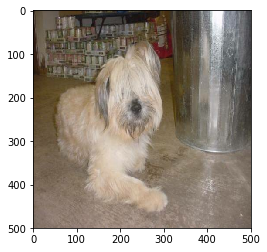

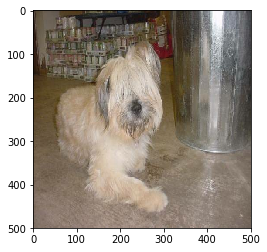

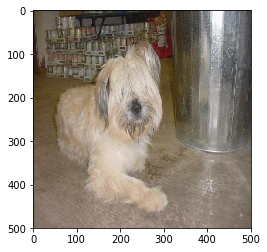

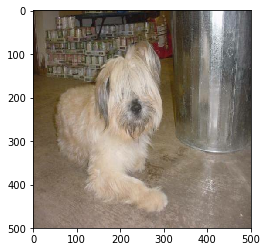

In [62]:
# 图片缩放测试，按照比例对长宽进行缩放
import matplotlib.pyplot as plt;

 
image_raw_data_jpg = tf.gfile.FastGFile('./train/dog.10517.jpg', 'rb').read()
 
with tf.Session() as sess:
    img_data_jpg = tf.image.decode_jpeg(image_raw_data_jpg)
    img_data_jpg = tf.image.convert_image_dtype(img_data_jpg, dtype=tf.float32)
    resize_0 = tf.image.resize_images(img_data_jpg, (500, 500), method=0)
    resize_1 = tf.image.resize_images(img_data_jpg, (500, 500), method=1)
    resize_2 = tf.image.resize_images(img_data_jpg, (500, 500), method=2)
    resize_3 = tf.image.resize_images(img_data_jpg, (500, 500), method=3)

    print(resize_0.get_shape)
 
    plt.figure(0)
    plt.imshow(resize_0.eval())
    plt.figure(1)
    plt.imshow(resize_1.eval())
    plt.figure(2)
    plt.imshow(resize_2.eval())
    plt.figure(3)
    plt.imshow(resize_3.eval())
 
    plt.show()

![](./train/dog.10517.jpg)

In [7]:
import functools

# 这里出现了错误，参考https://blog.csdn.net/he_wen_jie/article/details/80255611
def parser(i, l, w, h):
    i_string = tf.read_file(i)
    i_decoded = tf.image.decode_jpeg(i_string, channels=3)
    i_decoded = tf.image.convert_image_dtype(i_decoded, tf.float32)
    #i_decoded = tf.image.per_image_standardization(i_decoded)
    i_decoded = tf.image.resize_images(i_decoded, (w, h), method=0)
    #i_float = tf.cast(i_decoded, tf.float32)
    return i_decoded, l


# 这里代码参考https://stackoverflow.com/questions/10834960/how-to-do-multiple-arguments-to-map-function-where-one-remains-the-same-in-pytho
# 生成相同大小的批次，并产生一个循环
def get_batch(im_label, image_W, image_H, batch_size):
    # image, label: 要生成batch的图像和标签list
    # image_W, image_H: 图片的宽高
    # batch_size: 每个batch有多少张图片
    # capacity: 队列容量
    # return: 图像和标签的batch

    # 将python.list类型转换成tf能够识别的格式
    image = im_label[:, 0]
    label = im_label[:, 1].astype(int)
    #image = tf.cast(image, tf.string)
    #label = tf.cast(label, tf.int32)
    image_const = tf.constant(image)
    label_const = tf.constant(label)
    
    dataset = tf.data.Dataset.from_tensor_slices((image_const, label_const))
    
    dataset = dataset.map(functools.partial(parser, w=image_W, h=image_H))
    dataset = dataset.batch(batch_size)
    
    iterator = dataset.make_one_shot_iterator()
    return iterator.get_next()

label: 1


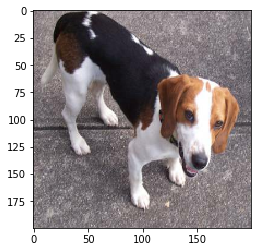

0.004313823 1.0
label: 0


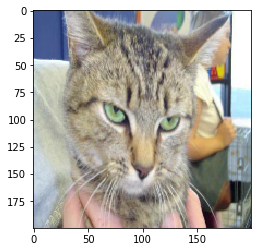

0.0 1.0
label: 0


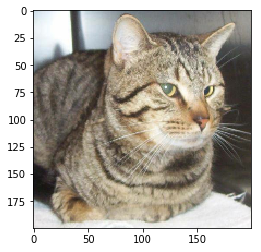

0.06550963 1.0


In [8]:
BATCH_SIZE = 3
CAPACITY = 256
IMG_W = 200
IMG_H = 200

train_dir = "./train"
im_label = get_im_labels(train_dir)
next_iter = get_batch(im_label, IMG_W, IMG_H, BATCH_SIZE)

with tf.Session() as sess:
    img, label = sess.run(next_iter)
    for j in np.arange(BATCH_SIZE):
        print("label: %s" % label[j])
        plt.imshow(img[j, :, :, :])
        plt.show()
        print(img[j,:,:,:].min(), img[j,:,:,:].max())

In [9]:
def inference(images, batch_size, n_classes):
    # conv1, shape = [kernel_size, kernel_size, channels, kernel_numbers]
    with tf.variable_scope("conv1") as scope:
        weights = tf.get_variable("weights",
                                  shape=[3, 3, 3, 16],
                                  dtype=tf.float32,
                                  initializer=tf.truncated_normal_initializer(stddev=0.1, dtype=tf.float32))
        biases = tf.get_variable("biases",
                                 shape=[16],
                                 dtype=tf.float32,
                                 initializer=tf.constant_initializer(0.1))
        conv = tf.nn.conv2d(images, weights, strides=[1, 1, 1, 1], padding="SAME")
        pre_activation = tf.nn.bias_add(conv, biases)
        conv1 = tf.nn.relu(pre_activation, name="conv1")

    # pool1 && norm1
    with tf.variable_scope("pooling1_lrn") as scope:
        pool1 = tf.nn.max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1],
                               padding="SAME", name="pooling1")
        norm1 = tf.nn.lrn(pool1, depth_radius=4, bias=1.0, alpha=0.001/9.0,
                          beta=0.75, name='norm1')

    # conv2
    with tf.variable_scope("conv2") as scope:
        weights = tf.get_variable("weights",
                                  shape=[3, 3, 16, 16],
                                  dtype=tf.float32,
                                  initializer=tf.truncated_normal_initializer(stddev=0.1, dtype=tf.float32))
        biases = tf.get_variable("biases",
                                 shape=[16],
                                 dtype=tf.float32,
                                 initializer=tf.constant_initializer(0.1))
        conv = tf.nn.conv2d(norm1, weights, strides=[1, 1, 1, 1], padding="SAME")
        pre_activation = tf.nn.bias_add(conv, biases)
        conv2 = tf.nn.relu(pre_activation, name="conv2")

    # pool2 && norm2
    with tf.variable_scope("pooling2_lrn") as scope:
        pool2 = tf.nn.max_pool(conv2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1],
                               padding="SAME", name="pooling2")
        norm2 = tf.nn.lrn(pool2, depth_radius=4, bias=1.0, alpha=0.001/9.0,
                          beta=0.75, name='norm2')

    # full-connect1
    with tf.variable_scope("fc1") as scope:
        reshape = tf.reshape(norm2, shape=[batch_size, -1])
        dim = reshape.get_shape()[1].value
        weights = tf.get_variable("weights",
                                  shape=[dim, 128],
                                  dtype=tf.float32,
                                  initializer=tf.truncated_normal_initializer(stddev=0.005, dtype=tf.float32))
        biases = tf.get_variable("biases",
                                 shape=[128],
                                 dtype=tf.float32,
                                 initializer=tf.constant_initializer(0.1))
        fc1 = tf.nn.relu(tf.matmul(reshape, weights) + biases, name="fc1")

    # full_connect2
    with tf.variable_scope("fc2") as scope:
        weights = tf.get_variable("weights",
                                  shape=[128, 128],
                                  dtype=tf.float32,
                                  initializer=tf.truncated_normal_initializer(stddev=0.005, dtype=tf.float32))
        biases = tf.get_variable("biases",
                                 shape=[128],
                                 dtype=tf.float32,
                                 initializer=tf.constant_initializer(0.1))
        fc2 = tf.nn.relu(tf.matmul(fc1, weights) + biases, name="fc2")

    # softmax
    with tf.variable_scope("softmax_linear") as scope:
        weights = tf.get_variable("weights",
                                  shape=[128, n_classes],
                                  dtype=tf.float32,
                                  initializer=tf.truncated_normal_initializer(stddev=0.005, dtype=tf.float32))
        biases = tf.get_variable("biases",
                                 shape=[n_classes],
                                 dtype=tf.float32,
                                 initializer=tf.constant_initializer(0.1))
        softmax_linear = tf.add(tf.matmul(fc2, weights), biases, name="softmax_linear")
        softmax_linear = tf.nn.softmax(softmax_linear)
    return softmax_linear    

In [10]:
def losses(logits, labels):
    with tf.variable_scope("loss") as scope:
        cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,
                                                                       labels=labels, name="xentropy_per_example")
        loss = tf.reduce_mean(cross_entropy, name="loss")
        tf.summary.scalar(scope.name + "loss", loss)
    return loss


def trainning(loss, learning_rate):
    with tf.name_scope("optimizer"):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        global_step = tf.Variable(0, name="global_step", trainable=False)
        train_op = optimizer.minimize(loss, global_step=global_step)
    return train_op


def evaluation(logits, labels):
    with tf.variable_scope("accuracy") as scope:
        correct = tf.nn.in_top_k(logits, labels, 1)
        correct = tf.cast(correct, tf.float16)
        accuracy = tf.reduce_mean(correct)
        tf.summary.scalar(scope.name + "accuracy", accuracy)
    return accuracy

In [11]:
IMG_W = 200
IMG_H = 200
BATCH_SIZE = 16
N_CLASSES = 2
learning_rate = 0.00001

train_dir = './train'
log_dir =  './log'

def run_training(train_dir, log_dir):

    im_label = get_im_labels(train_dir)
    dataset = get_batch(im_label, IMG_W, IMG_H, BATCH_SIZE)
    
    train_logits = inference(dataset[0], BATCH_SIZE, N_CLASSES)
    train_loss = losses(train_logits, dataset[1])
    train_op = trainning(train_loss, learning_rate)
    train_acc = evaluation(train_logits, dataset[1])

    summary_op = tf.summary.merge_all()
    with tf.Session() as sess:
        #tf.get_variable_scope().reuse_variables()
        train_writer = tf.summary.FileWriter(log_dir, sess.graph)
        saver = tf.train.Saver()
        sess.run(tf.global_variables_initializer())
    
        for i, (img, lab) in enumerate(dataset):
            _, tra_loss, tra_acc = sess.run([train_op, train_loss, train_acc])
            if i % 100 == 0:
                print("Step %d, train loss = %.2f, train accuracy = %.2f%%" % (i, tra_loss, tra_acc))
                summary_str = sess.run(summary_op)
                train_writer.add_summary(summary_str, i)

        checkpoint_path = os.path.join(log_dir, "model.ckpt")
        saver.save(sess, checkpoint_path, global_step=i)
    
    print('done')

In [12]:
run_training(train_dir, log_dir)

ValueError: Shape of a new variable (fc1/weights) must be fully defined, but instead was (?, 128).